In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [2]:
iris=datasets.load_iris()

In [3]:
X=iris["data"][:,(2,3)]
Y=iris["target"]

setosa_or_versicolor =(Y==0)| (Y==1)
X=X[setosa_or_versicolor]
Y=Y[setosa_or_versicolor]

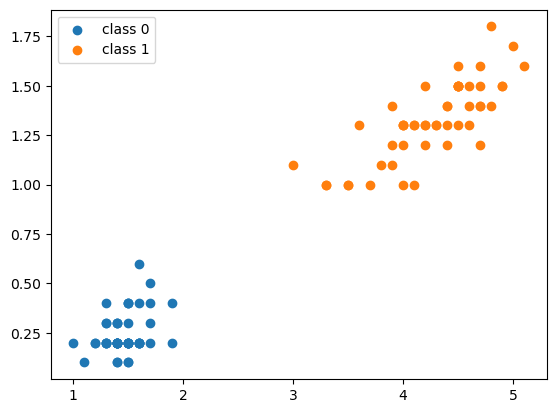

In [4]:
plt.scatter(X[:,0][Y==0],X[:,1][Y==0],label="class 0")
plt.scatter(X[:,0][Y==1],X[:,1][Y==1],label="class 1")
plt.legend()
plt.show()

In [5]:
X.shape

(100, 2)

In [6]:
Y.shape

(100,)

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 

svm_clf = SVC(kernel="linear", C=1.0) 

svm_clf.fit(X_train, Y_train)

accuracy = svm_clf.score(X_test, Y_test)

print("Accuracy on test data:", accuracy)

Accuracy on test data: 1.0


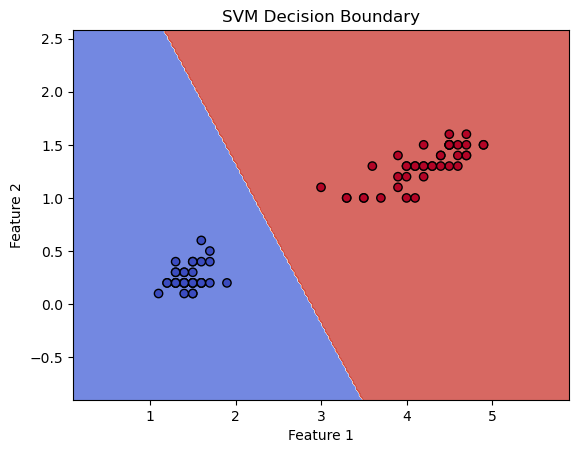

In [8]:
h = 0.02 
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=plt.cm.coolwarm, edgecolors='k')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary')
plt.show()
